<a href="https://colab.research.google.com/github/Noahkandie/East-Africa-Bank-Factor-Analysis/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2020_07_Noah_Kandie_PythonNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda

## Defining the Question

### Specifying the Data Analytic Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### Defining the Metric for Success

-Providing an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, 
-Providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### Experimental design taken

In this study, we will be conducting Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables hence coming up with a prediction on individuals who are most likely to have or use a bank account
In the Multivariate Analysis, we will use Factor Analysis as a Reduction Method in analysing the Data

### Data Relevance

The data contains important variables such as Gender, Education level, Age, Has a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not.
The data provided is for the year 2016 to 2018 for all the countries in our study, i.e(Kenya, Rwanda, Tanzania, and Uganda) which will enable us come up with trends to depict which group of people are likely to have a bank account. 


## Reading the Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# Read the dataset

df=pd.read_csv('http://bit.ly/FinancialDataset',error_bad_lines=False)

df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
# Preview the tail of the data
df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


## Check Data


In [4]:
# Check info on dataset
df.info()

# The data has 23524 rows and 13 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [5]:
# Describe the data
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


## Data Cleaning

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


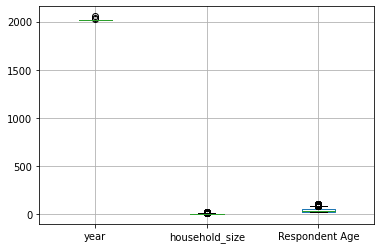

In [6]:
# Plot a box plot
df.boxplot()

# We take note of the outliers in the data. The Respondents age
# is a suspect outlier because its data could be significant

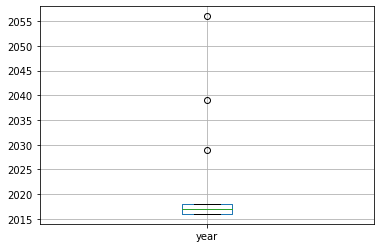

In [7]:
# Check the year column 
df.boxplot(column='year')

# There are 3 outliers, all above 2025

In [8]:
df.shape

(23524, 13)

In [9]:
# Drop the outliers
df=df[df['year']<2020]
df.shape


(23521, 13)

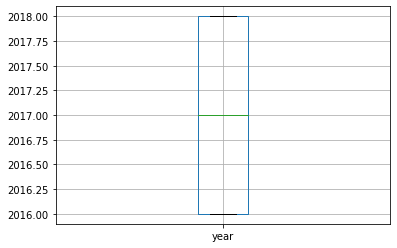

In [10]:
# Checkif outliers were dropped
df.boxplot(column='year')

(23521, 13)


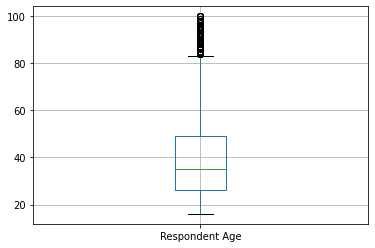

In [11]:
# Check the Respondents age column boxplot

df.boxplot(column='Respondent Age')
print(df.shape)
# There are  outliers. The outliers liein the range (80<x<105).
# from extrenal source, The ages are relevant

(23521, 13)


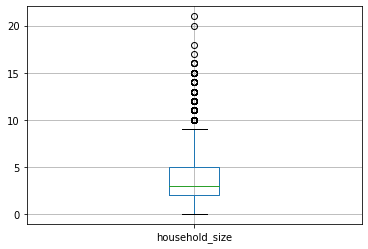

In [12]:
# Check the Household size column boxplot
print(df.shape)
df.boxplot(column='household_size')

# There are quite a few outliers. The outliers range is (10<x<25)

In [13]:
# Drop outliers from household size using quartile method
q_low = df["household_size"].quantile(0.01)
q_hi  = df["household_size"].quantile(0.99)

df= df[(df["household_size"] < q_hi) & (df["household_size"] > q_low)]

(19113, 13)


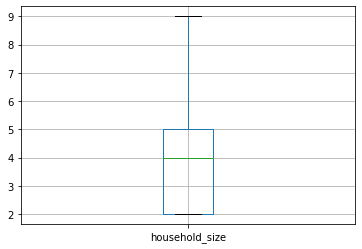

In [14]:
# Review boxplot
print(df.shape)
df.boxplot(column=['household_size'])

In [15]:
# Check for missing data

df.isnull()

# The number of rows with null values is insignificant, so they are dropped

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,False,False,False,False,False,False,False,False,False,False,False,False,False
23519,False,False,False,False,False,False,False,False,False,False,False,False,False
23520,False,False,False,False,False,False,False,False,False,False,False,False,False
23521,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
# Drop null values
df.dropna(axis=0,inplace=True)
print(df.shape)
df.isnull().sum()


(19000, 13)


country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [17]:
# Check for duplicates and drop them if present
print(df.duplicated().sum())
df.drop_duplicates().shape

# No duplicated are present

0


(19000, 13)

In [18]:
# Drop the unneeded columns
df.drop(columns='uniqueid',inplace=True)

In [19]:
# Rename the necessary columns

df.rename(columns={'Type of Location':'location', 'Respondent Age' : 'age','Has a Bank account':'bank_account',
 'gender_of_respondent':'gender','The relathip with head':'rship_head',
'Level of Educuation':'education', 'Type of Job': 'job','Cell Phone Access':'cell_access'}, 
                 inplace=True)
df.head()

,country,year,bank_account,location,cell_access,household_size,age,gender,rship_head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [20]:
# Change the data types to categorical data

df['country'] = df['country'].astype('category')
df['bank_account'] = df['bank_account'].astype('category')
df['location'] = df['location'].astype('category')
df['gender'] = df['gender'].astype('category')
df['age'] = df['age'].astype('int64')
df['education'] = df['education'].astype('category')
df['year']= df['year'].astype('object')
df['job'] = df['job'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19000 entries, 0 to 23522
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country         19000 non-null  category
 1   year            19000 non-null  object  
 2   bank_account    19000 non-null  category
 3   location        19000 non-null  category
 4   cell_access     19000 non-null  object  
 5   household_size  19000 non-null  float64 
 6   age             19000 non-null  int64   
 7   gender          19000 non-null  category
 8   rship_head      19000 non-null  object  
 9   marital_status  19000 non-null  category
 10  education       19000 non-null  category
 11  job             19000 non-null  category
dtypes: category(7), float64(1), int64(1), object(3)
memory usage: 1021.9+ KB


In [21]:
# Preview the data
df.head()

,country,year,bank_account,location,cell_access,household_size,age,gender,rship_head,marital_status,education,job
0,Kenya,2018,Yes,Rural,Yes,3.0,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [22]:
pd.crosstab(df['education'],df['job'])

job,Dont Know/Refuse to answer,Farming and Fishing,Formally employed Government,Formally employed Private,Government Dependent,Informally employed,No Income,Other Income,Remittance Dependent,Self employed
education,,,,,,,,,,
6,0,0,0,1,0,13,3,1,2,1
No formal education,12,1242,4,23,80,960,61,150,334,694
Other/Dont know/RTA,0,0,1,1,0,0,0,2,0,1
Primary education,64,2785,33,229,64,2808,187,442,760,3042
Secondary education,27,815,104,191,7,663,99,248,721,733
Tertiary education,2,47,97,142,6,121,28,26,116,201
Vocational/Specialised training,0,85,65,136,4,62,6,30,72,146


## Exploratory Analysis


### Univariate Analysis  



(Mode, Median, Mean, Skewness, Kurtosis)
with Visualizations

In [23]:
# Calculate the mean
df.mean()

# The mean age was ~38 years and the mean household size ~5

year              2016.925737
household_size       4.104158
age                 38.026316
dtype: float64

In [24]:
# Calculate the mode 
df.mode()

,country,year,bank_account,location,cell_access,household_size,age,gender,rship_head,marital_status,education,job
0,Rwanda,2016,No,Rural,Yes,2.0,30,Female,Head of Household,Married/Living together,Primary education,Farming and Fishing


In [25]:
# calculate the median
df.median()


year              2017.0
household_size       4.0
age                 35.0
dtype: float64

In [26]:
# Get min, max, Range
# age
df['age'].min()
print('The min(age) is ',df['age'].min())
df['age'].max()
print('The max(age) is ',df['age'].max())
range=df['age'].max()-df['age'].min()
print('The range of age is ',range)

The min(age) is  16
The max(age) is  100
The range of age is  84


In [27]:
# Household size
df['household_size'].min()
print('The min(household size) is ',df['household_size'].min())
df['household_size'].max()
print('The max(household size) is ',df['household_size'].max())
range_h=df['household_size'].max()-df['household_size'].min()
print('The range of household size is ',range_h)

The min(household size) is  2.0
The max(household size) is  9.0
The range of household size is  7.0


In [28]:
# Check the quartiles
df.quantile([0.25,0.5,0.75])

,household_size,age
0.25,2.0,26.0
0.50,4.0,35.0
0.75,5.0,47.0


In [29]:
# The inter-quartile range
# Age
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
IQR=q3-q1
print('The IQR od age is ', IQR)

The IQR od age is  21.0


In [30]:
# Standard deviation and Variance
df.std()


year               0.880161
household_size     1.885100
age               15.926301
dtype: float64

In [31]:
# Variance
df.var()

year                0.774684
household_size      3.553601
age               253.647078
dtype: float64

In [32]:
# Skewness
df.skew()

year              0.144819
household_size    0.648669
age               0.865793
dtype: float64

In [33]:
# Kurtosis
df.kurt()

year             -1.693916
household_size   -0.484903
age               0.237678
dtype: float64

Rwanda      8117
Kenya       4949
Tanzania    4177
Uganda      1757
Name: country, dtype: int64


Text(0.5, 1.0, 'Pie chart of the distribution of the reposndents Per country')

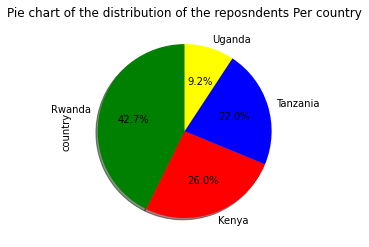

In [34]:
# Frequency tables and visualizations

# Countries
country=df['country'].value_counts()
print(country)

# Plot pie chart
colors=['green','red','blue','yellow']
country.plot(kind='pie',colors=colors,autopct='%1.1f%%',shadow=True,startangle=90)
plt.title('Pie chart of the distribution of the reposndents Per country')

Female    11275
Male       7725
Name: gender, dtype: int64


Text(0.5, 1.0, 'Pie Chart of Gender distribution')

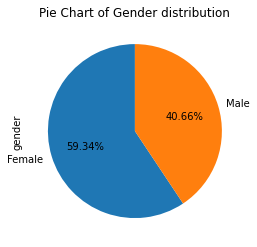

In [35]:
# Gender
gen=df.gender.value_counts()
print(gen)
gen.plot(kind='pie',startangle=90,autopct='%1.2f%%')

plt.title('Pie Chart of Gender distribution')

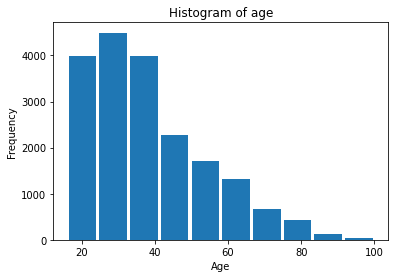

In [36]:
# Age
# Plot the histogram of age
df['age'].plot(kind='hist',bins=10,rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Histogram of age')
plt.show()

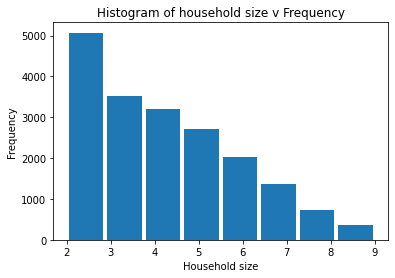

In [37]:
# Age
# Plot the histogram of age
plt.hist(df['household_size'], bins=8, histtype='bar', rwidth=0.9)
plt.ylabel('Frequency')
plt.xlabel('Household size')
plt.title('Histogram of household size v Frequency')
plt.show()

No     16421
Yes     2579
Name: bank_account, dtype: int64


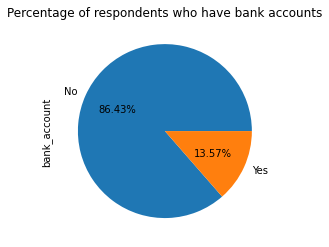

In [38]:
# How many people have bank accounts
print(df['bank_account'].value_counts())
df['bank_account'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Percentage of respondents who have bank accounts')
plt.show()

*Conclusion*

1. The Majority 86.4% do not have a bank acount
2. The distribution gender among the respondents is 59% women and 41% Men
3. Greater population in the dataset is between the ages of 25 and 30
4. Most respondents have a household size of between 2 and 4
5. Majority of the respondents came from Rwanda. The countries are listed below:
*   Rwanda
*   Kenya
*   Tanzania
*   Uganda







### Bivariate data

#### Numerical and numerical

Text(0.5, 1.0, 'Scatterplot of age vs household size')

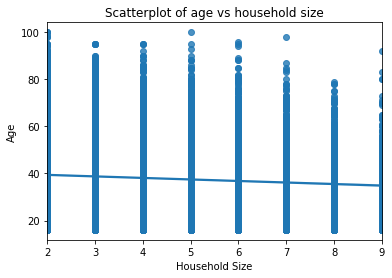

In [39]:

# Scatter Plot
# 
sns.regplot(y=df['age'],x=df['household_size'])
plt.xlabel('Household Size')
plt.ylabel('Age')
plt.title('Scatterplot of age vs household size')


In [40]:
# Correlation 
r_coeff=df['age'].corr(df['household_size'],method='pearson')
print('The Pearson coefficient= ',r_coeff)

# The r value of -0.0769 shows a weak negative correlation between the two variable
# This is insignificant

The Pearson coefficient=  -0.07693553202684547


In [41]:
# Check dataframe for any other correlations

df.corr()

,household_size,age
household_size,1.000000,-0.076936
age,-0.076936,1.000000


#### Categorical and categorical

bank_account    No   Yes
country                 
Kenya         3793  1156
Rwanda        7191   926
Tanzania      3827   350
Uganda        1610   147


Text(0.5, 0, 'Country')

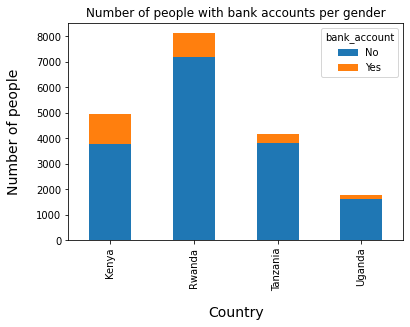

In [42]:

# Stacked columns

# Country
country1=pd.crosstab(df['country'],df['bank_account'])
print(country1)
country1.plot(kind='bar',stacked=True,title='Number of people with bank accounts per gender')
plt.ylabel('Number of people',fontsize=14, labelpad=15)
plt.xlabel('Country',fontsize=14, labelpad=15)
# The majority of the respondents did not have bank accounts
# Kenya leads in bank_accnt =yes and rwanda leads in banks_accnt=no

bank_account     No   Yes
gender                   
Female        10080  1195
Male           6341  1384


Text(0.5, 0, 'Gender')

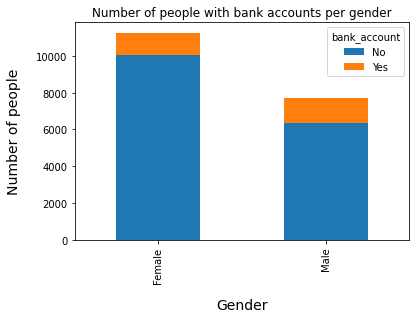

In [43]:
# Gender
nch=pd.crosstab(df['gender'],df['bank_account'])
print(nch)
nch.plot(kind='bar',stacked=True,title='Number of people with bank accounts per gender')
plt.ylabel('Number of people',fontsize=14, labelpad=15)
plt.xlabel('Gender',fontsize=14, labelpad=15)

#the difference between the males and females who own a bank account is 
#significant. The number of Males who own a bank account is significantly more 
#than females.

bank_account                        No       Yes
job                                             
Dont Know/Refuse to answer    0.004947  0.000579
Farming and Fishing           0.231526  0.030263
Formally employed Government  0.003684  0.012316
Formally employed Private     0.018316  0.019737
Government Dependent          0.006789  0.001684
Informally employed           0.224842  0.018684
No Income                     0.019737  0.000474
Other Income                  0.039789  0.007526
Remittance Dependent          0.095526  0.010000
Self employed                 0.219105  0.034474


Text(0.5, 1.0, 'Distribution of bank account per employment status')

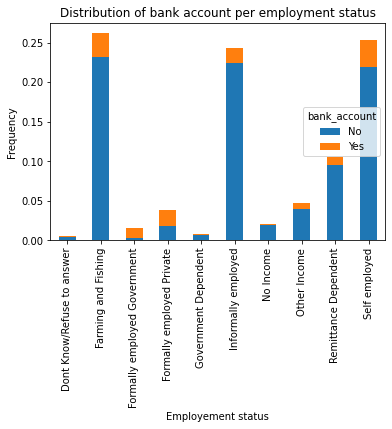

In [44]:
# Employment Status
job_ct=pd.crosstab(df['job'],df['bank_account'].sort_values(ascending=True),normalize=True)
print(job_ct)
job_ct.plot.bar(stacked=True)
plt.xlabel('Employement status')
plt.ylabel('Frequency')
plt.title('Distribution of bank account per employment status')

#From output, we can conclude 
#Individuals who are self employed are most likely to have a bank account and
# those who are informally employed are less likely to have a bank account

bank_account     No   Yes
location                 
Rural         10886  1326
Urban          5535  1253
bank_account        No       Yes
location                        
Rural         0.891418  0.108582
Urban         0.815410  0.184590


Text(0, 0.5, 'Ratio')

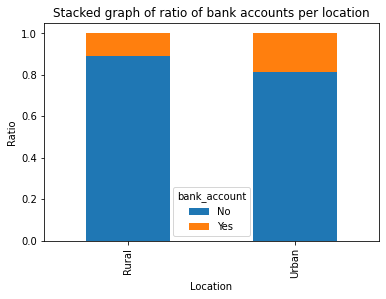

In [45]:
# Location
loc_ct=pd.crosstab(df['location'],df['bank_account'],normalize='index')
print(pd.crosstab(df['location'],df['bank_account']))
print(loc_ct)

loc_ct.plot.bar(stacked=True,title='Stacked graph of ratio of bank accounts per location')
plt.xlabel('Location')
plt.ylabel('Ratio')

# while the people having bank accounts in the ruraland urban areas being close
# the ration of people having bank accounts in the Urban areas 18% is larger than
# the rural area 10.8%

Text(0.5, 1.0, 'Distribution of bankaccounts per educational level')

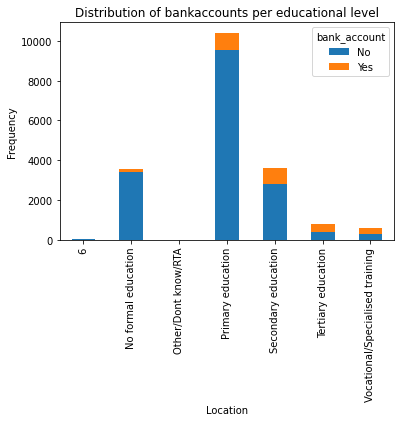

In [46]:
edu=pd.crosstab(df['education'],df['bank_account'])
edu.plot.bar(stacked=True)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Distribution of bankaccounts per educational level')


#### Categorical and Numerical

In [47]:
# Line Charts
# I could not find a relationship that fit the line graph


*Conclusion*




1.   More males than women are likely to have bank accounts
2.   Those whole are employed are likely to have bank accounts than those unempeloyed
3.   Individuals from medium sized homes are most likely to have a bank account and those from very large families are less likely to have a bank account
4.   Individuals from Kemya have a bank account, while Uganda has a low probability
5.   Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account
6.   Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account



### Multivariate Analysis

In [48]:
# Preview the dataset columns
df.columns

Index(['country', 'year', 'bank_account', 'location', 'cell_access',
       'household_size', 'age', 'gender', 'rship_head', 'marital_status',
       'education', 'job'],
      dtype='object')

In [49]:
# Check data types
df.dtypes

country           category
year                object
bank_account      category
location          category
cell_access         object
household_size     float64
age                  int64
gender            category
rship_head          object
marital_status    category
education         category
job               category
dtype: object

In [50]:
df_1=df

In [51]:
# Label encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_1['gender']=label_encoder.fit_transform(df_1['gender'])


df_1['bank_account']=label_encoder.fit_transform(df_1['bank_account'])


df_1['cell_access']=label_encoder.fit_transform(df_1['cell_access'])

df_1['country']=label_encoder.fit_transform(df_1['country'])

df_1['education']=label_encoder.fit_transform(df_1['education'])

df_1['job']=label_encoder.fit_transform(df_1['job'])

df_1['year']=label_encoder.fit_transform(df_1['year'])

df_1['location']=label_encoder.fit_transform(df_1['location'])


df_1['marital_status']=label_encoder.fit_transform(df_1['marital_status'])


df_1['rship_head']=label_encoder.fit_transform(df_1['rship_head'])


In [52]:
df_1.drop(columns=['rship_head','year','age'],inplace=True)

In [53]:
# Install factor analyzer

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(df_1)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(13719.776225730873, 0.0)

In [54]:
# Calculate the KMO value
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_1)
calculate_kmo(df_1)
# Value of KMO less than 0.6 is considered inadequate.
# KMO value od 0.615 means we can proceed as it is adequate

(                     KMO
 country         0.641344
 bank_account    0.621505
 location        0.624630
 cell_access     0.690207
 household_size  0.696187
 gender          0.690823
 marital_status  0.657482
 education       0.601029
 job             0.617630, 0.6371854359402517)

In [55]:
# We Choosing the Number of Factors
 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 9, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# We choose the factors that are > 1.
# so we choose 3 factors only

,Original_Eigenvalues
0,1.898037
1,1.586359
2,1.054582
3,0.932665
4,0.836747
5,0.807060
6,0.698543
7,0.656450
8,0.529555


In [56]:
# Perform factor analysis by creating factor analysis object

fa = FactorAnalyzer()
fa.analyze(df_1, 3, rotation="varimax")
fa.loadings


# we note that:
# Factor 1 has high factor loadings for [Location] 70%
# Factor 2 has high factor loadings for [Education] 60%
# Factor 3 has high factor loadings for [Country]74%

,Factor1,Factor2,Factor3
country,0.183377,-0.097078,0.741936
bank_account,0.086590,0.481321,-0.168343
location,0.701414,0.128883,0.068097
cell_access,-0.184713,0.409677,-0.100833
household_size,-0.375312,0.059566,-0.121468
gender,-0.038240,0.203519,0.018530
marital_status,0.175120,-0.159167,-0.040144
education,0.126288,0.600399,-0.003872
job,0.480108,-0.018317,0.371681


In [57]:
# Getting variance of each factors
# 
fa.get_factor_variance()

# we note that:
# 28.8% cummulative variance explained by the 3 Factors

,Factor1,Factor2,Factor3
SS Loadings,0.986666,0.856657,0.748484
Proportion Var,0.109630,0.095184,0.083165
Cumulative Var,0.109630,0.204814,0.287979


*Conclusion*

1. The reduction technique used was Factor Analysis
2. The KMO value was 0.615 which was moderately sufficient to model the data 
and check the linear relationship
3. 3 factors had Eigen values greater than 1.
4. The three factors had high factor loading in the following columns
*   Type of Location
*   Education
*   Country
5. The cummulative variance of 28.8% explained by the 3 Factors. 
This means that the 3 factors only explain 0.288 of the data






## Challenging the Solution

The solution can be challenged by increasing the accuracy of the model
A different modelcan be used to increase accuracy and significance